In [273]:
#Import numpy for arrays

import numpy as np
import matplotlib.pyplot as plt


In [104]:
#Import Landlab raster arrays
from landlab import RasterModelGrid 

#Import landlab graph plotting
from landlab.plot.graph import plot_graph

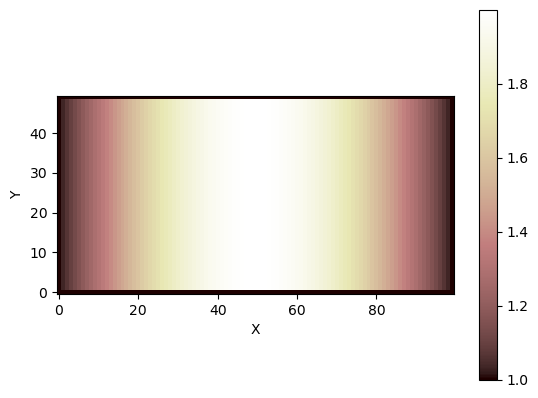

In [266]:
#generate grid
grid = RasterModelGrid((50, 100), xy_spacing=1.0)
#generate layer of ice thickness within grid
z_ice = grid.add_ones("ice_thickness", at="node")
x = grid.x_of_node
z_ice *= np.sin(np.pi*x/(grid.number_of_node_columns - 1))
z_ice[grid.boundary_nodes] *= 0
#generate layer of soil
z_soil = grid.add_ones("soil__depth", at="node")
#generate topography as a function of soil thickness and ice
elev =grid.add_zeros("topographic__elevation", at = "node")
elev = z_ice + z_soil
#plot topography
grid.imshow(elev)

In [242]:
#Import DepthDependentTaylorDiffuser from Landland
from landlab.components import DepthDependentTaylorDiffuser

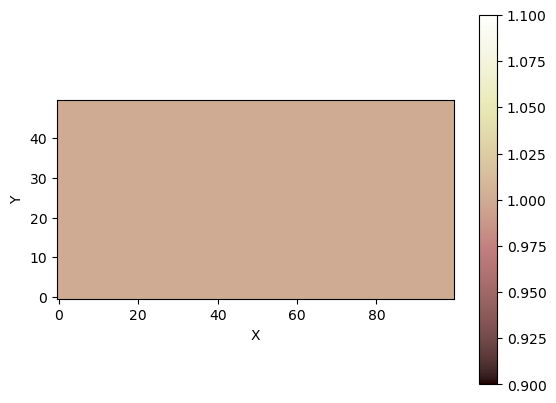

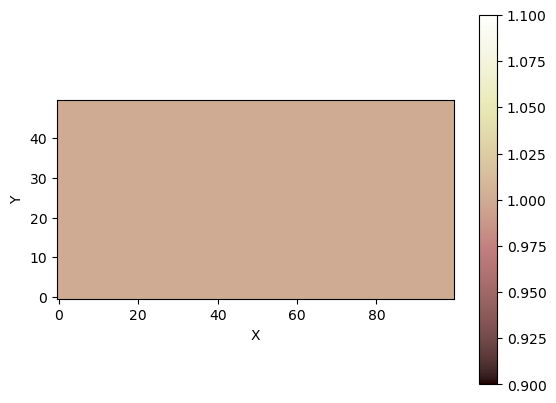

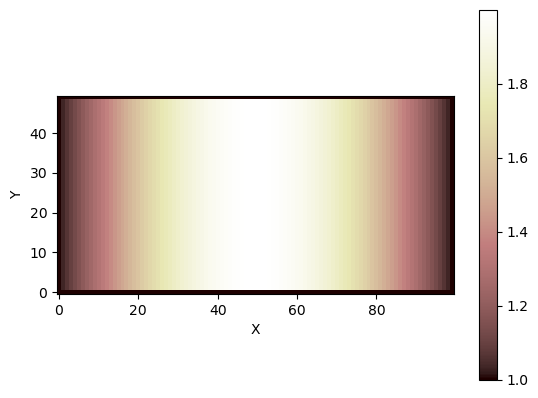

In [267]:
DepthDependentTaylorDiffuser.input_var_names
grid.imshow(z_soil)
plt.show()
grid.imshow(soil_production)
plt.show()
grid.imshow(elev)

In [265]:
soil_production =grid.add_ones("soil_production__rate", at = "node")
diffuse = DepthDependentTaylorDiffuser(grid)

In [271]:
diffuse.run_one_step(1000)

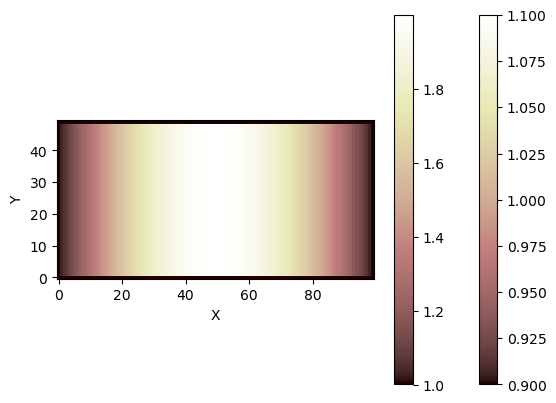

In [272]:
grid.imshow(z_soil)
grid.imshow(elev)

In [ ]:
#create ThawIce function

class ThawIce:
    def __init__ (self, ice_thickness):
        self.ice_thickness = ice_thickness 

    def thaw (self, thaw_rate, dt):
        self.thaw_rate = thaw_rate
        self.dt = dt
        self.ice_thickness = self.dt*(self.ice_thickness - self.thaw_rate)

oop = ThawIce(z_ice)

oop.thaw(1, 1)

grid.imshow(oop.ice_thickness)